In [1]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
from IPython.display import display
from PIL import *

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

## Data Preprocessing

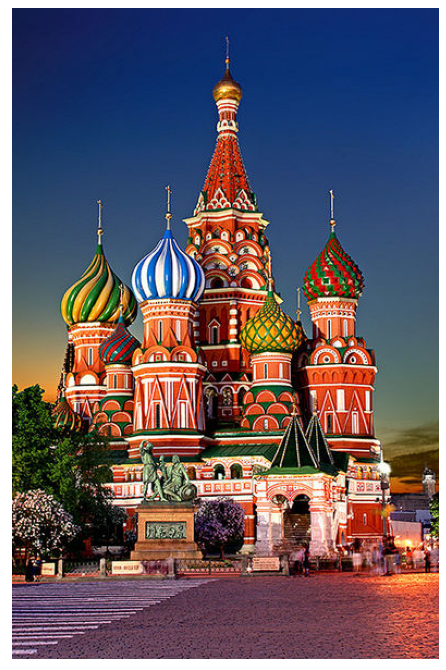

In [3]:
img = io.imread('images/1-Saint-Basils-Cathedral.jpg')

ax = plt.axes(xticks = [], yticks = [])
ax.imshow(img)

In [4]:
img.shape
# 600 rows and 394 columns with 3(RGB) colors in it.

(600, 394, 3)

In [5]:
img_data = (img / 255.0).reshape(-1, 3) # or(600*394)
img_data.shape

(236400, 3)

## Visualizing the color space using point clouds

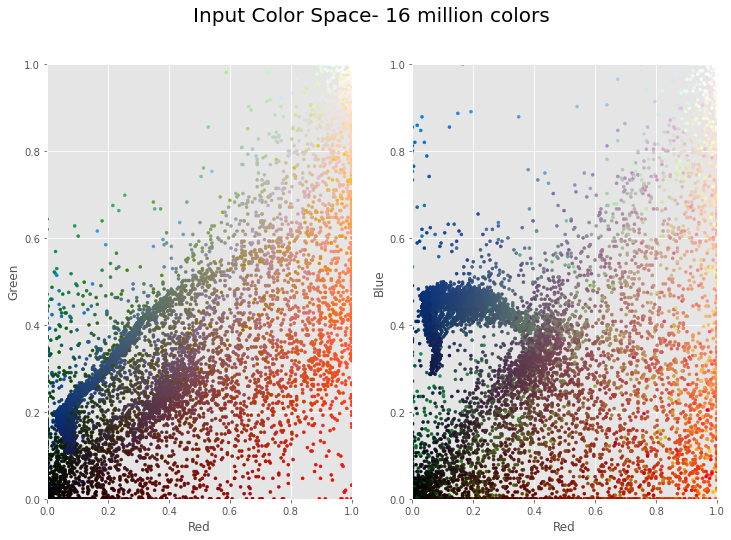

In [6]:
from plot_utils import plot_utils
x = plot_utils(img_data, title ="Input Color Space- 16 million colors")
x.colorSpace()

## Visualizing the kmeans reduced color space

In [7]:
from sklearn.cluster import MiniBatchKMeans

C:\Users\Abinaya_UB\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


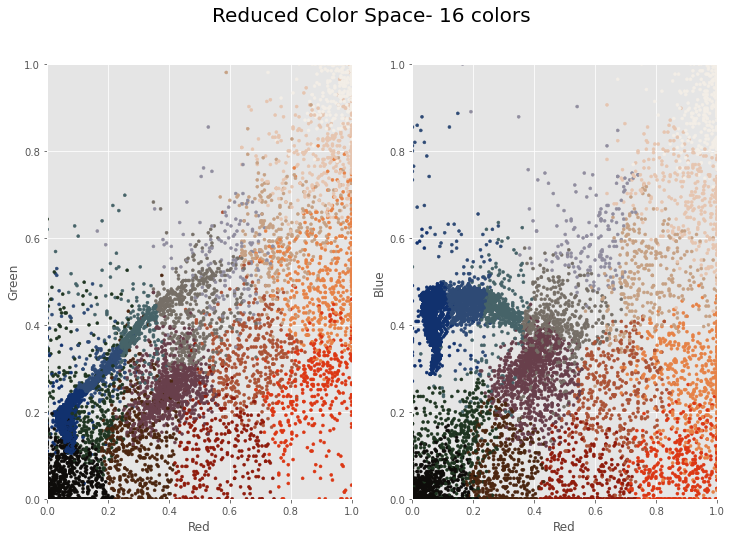

In [8]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors = k_colors, title = 'Reduced Color Space- 16 colors')
y.colorSpace()

## Kmeans image compression with interactive controls

In [9]:
img_dir = 'images/'

In [10]:
@interact
def color_compression(image = os.listdir(img_dir), k = IntSlider(min = 1, 
                                                                 max = 256, 
                                                                 step = 1, 
                                                                 value = 16, 
                                                                 continous_update = False, 
                                                                 layout = dict(width = '100%'))):
    input_img = io.imread(img_dir+image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-Means Image Compression', fontsize = 20)
    
    ax1.set_title('Compressed Image')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    
    ax2.set_title('Original Image (16 million color)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top = 0.85)
    #plt.show()
    button = widgets.Button(description="Click to download the compressed picture!")
    output = widgets.Output()

    display(button, output)

    def on_button_clicked(k_img):
        #with output:
        a = Image.fromarray(k_img, 'RGB')
        a.save("output_2.jpg")
        print("Compressed Picture downloaded!!")

    button.on_click(on_button_clicked(k_img))

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '2-new-york-skyli…

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '2-new-york-skyli…

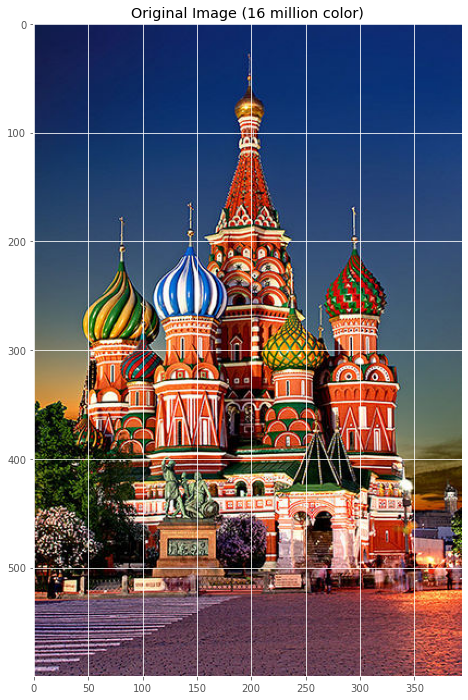

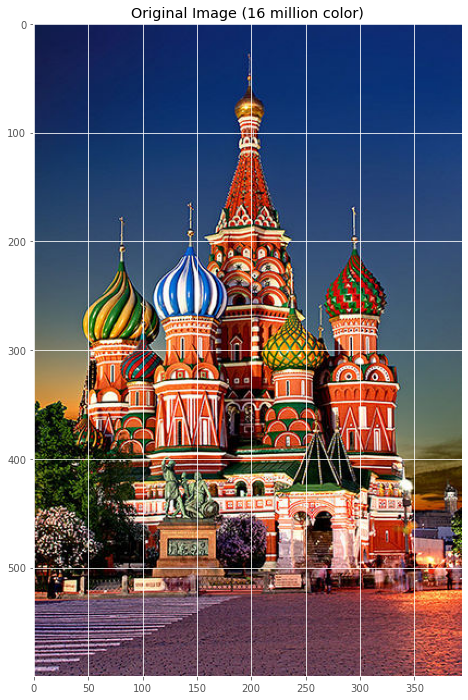

In [11]:
@interact
def color_compression(image = os.listdir(img_dir), k = IntSlider(min = 1, 
                                                                 max = 256, 
                                                                 step = 1, 
                                                                 value = 16, 
                                                                 continous_update = False, 
                                                                 layout = dict(width = '100%'))):
    input_img = io.imread(img_dir+image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    
    k_img = np.reshape(k_colors, (input_img.shape))
    
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig.suptitle('K-Means Image Compression', fontsize = 20)
    
    plt.title('Compressed Image')
    #plt.set_xticks([])
    #plt.set_yticks([])
    comp_im = plt.imshow(k_img)
    
    plt.title('Original Image (16 million color)')
    #plt.set_xticks([])
    #plt.set_yticks([])
    original_img = plt.imshow(input_img)
    
    #plt.subplots_adjust(top = 0.85)
    #plt.show()
    button = widgets.Button(description="Click to download the compressed picture!")
    output = widgets.Output()

    display(button, output)

    def on_button_clicked(comp_im):
        #with output:
        comp_im.savefig("output_1.jpg")
        print("Compressed Picture downloaded!!")

    button.on_click(on_button_clicked(comp_im))